<a href="https://colab.research.google.com/github/dhruvvk14/VGGT_Testing/blob/main/VGGT_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing dependencies

In [ ]:
!pip install vggt@git+https://github.com/facebookresearch/vggt.git
!pip install open3d

all imports

In [ ]:
import torch
from vggt.models.vggt import VGGT
from vggt.utils.load_fn import load_and_preprocess_images
import numpy as np
import open3d as o3d

import the model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
#use float32 cuz no gpu
dtype = torch.float32
model = VGGT.from_pretrained("facebook/VGGT-1B").to(device)


these are our predictions.

In [ ]:
filename = "testing_image.png"
image_names = ["testing_image.png"]
images = load_and_preprocess_images(image_names).to(device)
preds = []
with torch.no_grad():
    with torch.cuda.amp.autocast(dtype=dtype):

        predictions = model(images)
        preds.append(predictions)

tensor stuff.

to be honest, i didn't quite get what this part was.

edit1: turns out my first video was for math/physics, which is completely different...

edit2: its just matrices but the math in nn is quicker idk how tho i wanna research this more ngl

In [ ]:
print("Length: ", len(preds))
for predictions in preds:
  print (predictions)

not gonna lie this entire code was GPTed, just wanted to get a visualization of the point-map.

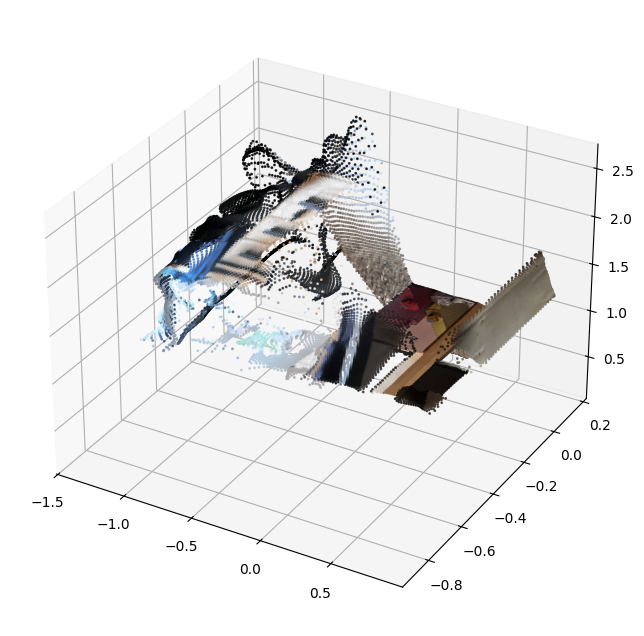

In [34]:
import matplotlib.pyplot as plt
from PIL import Image

# 1️⃣ Take preprocessed image
img_tensor = images[0].permute(1, 2, 0).cpu().numpy()
colors = (img_tensor - img_tensor.min()) / (img_tensor.max() - img_tensor.min())

# 2️⃣ Flatten points & confidence
points = predictions['world_points'].reshape(-1, 3).cpu().numpy()
conf_values = predictions['world_points_conf'].reshape(-1).cpu().numpy()

# 3️⃣ Mask by confidence
threshold = 0
mask = conf_values > threshold
points = points[mask]
colors = colors.reshape(-1, 3)[mask]

# 4️⃣ Optional subsample
points = points[::5]
colors = colors[::5]

# 5️⃣ Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors, alpha=0.8)
plt.show()

In [ ]:
img = Image.open("testing_image.png").convert("RGB")
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title("original image")
plt.show()

Processing `testing_image.png`

In [ ]:
print(predictions['depth'])

In [ ]:
# Get height and width
shape = predictions['world_points'].shape

H = shape[2]  # should be 392
W = shape[3]  # 518

v_center = H // 2  # should be196
u_center = W // 2  # 259
print(f"Center pixel: (u={u_center}, v={v_center})")

center_point = predictions['world_points'][0, 0, v_center, u_center]  # [x, y, z]
depth_z = center_point[2].item()
print(f"Depth at center pixel: {depth_z:.3f} m")



